C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\451959788.py:19: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=';')


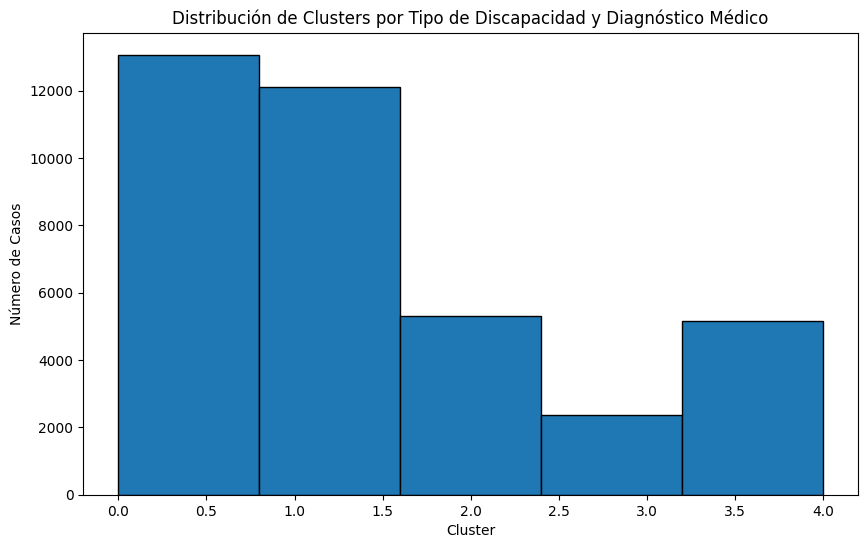


Cluster 0:
intelectual, auditiva, fisica, mental, retraso, multiple, psicosocial, sindrome, trastorno, paralisis

Cluster 1:
fisica, discapacidad, multiple, muscular, auditiva, adquiridos, ver, ñiñez, abdominal, abdomen

Cluster 2:
multiple, sindrome, epilepsia, discapacidad, fisica, paralisis, cerebral, auditiva, perdida, neurologica

Cluster 3:
visual, ceguera, glaucoma, discapacidad, multiple, perdida, ojo, dato, congenita, fisica

Cluster 4:
psicosocial, epilepsia, mental, sindrome, discapacidad, multiple, down, cerebral, retraso, hablar


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definicion de stop words en español
spanish_stop_words = ['a', 'al', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 
                     'durante', 'en', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por',
                     'según', 'sin', 'sobre', 'tras', 'el', 'la', 'los', 'las', 'un', 'una',
                     'unos', 'unas', 'y', 'o', 'pero', 'si', 'no', 'que', 'como', 'más',
                     'este', 'esta', 'estos', 'estas', 'aquel', 'aquella', 'aquellos',
                     'aquellas', 'mi', 'tu', 'su', 'nuestro', 'vuestro', 'cuyo', 'quien',
                     'donde', 'cuando', 'cuanto', 'cuanta', 'yo', 'me', 'mí', 'conmigo',
                     'tú', 'te', 'ti', 'contigo', 'él', 'ella', 'ello', 'sí', 'se', 'consigo',
                     'nosotros', 'nos', 'vosotros', 'os', 'ellos', 'ellas', 'les', 'lo', 'del']

# Carga de los datos
filepath = r"C:\Users\Lenovo\Visual\ARI\ARI\ProyectoIntegrador\prep-data\pcd_1211.csv"
df = pd.read_csv(filepath, sep=';')

# Unificamos las columnas de tipo de discapacidad y diagnostico especifico para a partir de ahi hacer las recomendaciones de politicas
df['discapacidad_combinada'] = (
    df['Tipo de discapacidad'].fillna('') + ' ' + 
    df['Describa aqui el diagnostico medico'].fillna('')
)

# Limpiar los espacios adicionales
df['discapacidad_combinada'] = df['discapacidad_combinada'].str.strip()

# Aplicar TF-IDF con la lista personalizada de stop words
tfidf_vectorizer = TfidfVectorizer(
    stop_words=spanish_stop_words,
    min_df=2,  # Ignorar términos que aparecen en menos de 2 documentos
    max_df=0.95  # Ignorar términos que aparecen en más del 95% de los documentos
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['discapacidad_combinada'])

# Aplicar KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Añadir la etiqueta del cluster
df['cluster'] = kmeans.labels_

# Visualizar
plt.figure(figsize=(10, 6))
plt.hist(df['cluster'], bins=num_clusters, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Número de Casos')
plt.title('Distribución de Clusters por Tipo de Discapacidad y Diagnóstico Médico')
plt.show()

# Para ver las palabras más relevantes en cada cluster
def print_cluster_terms(vectorizer, kmeans, n_terms=10):
    centroids = kmeans.cluster_centers_
    terms = vectorizer.get_feature_names_out()
    for i in range(num_clusters):
        print(f"\nCluster {i}:")
        # Obtener los índices de los términos más importantes
        indices = centroids[i].argsort()[-n_terms:][::-1]
        print(", ".join([terms[j] for j in indices]))

#  términos más relevantes de cada cluster
print_cluster_terms(tfidf_vectorizer, kmeans)
df.to_csv('datos_con_discapacidad_clusters.csv', index=False, sep=';')

# Overview del codigo 

Este código implementa un modelo de análisis basado en procesamiento de texto y estadísticas para generar recomendaciones de políticas públicas en los diferentes municipios, enfocándose en personas con discapacidad (PcD) y hechos victimizantes. Se apoya en técnicas de procesamiento de lenguaje natural (NLP), estadísticas descriptivas y visualización de datos. La estructura general del código incluye:

* **Procesamiento de Datos:**
    * Limpieza y combinación de datos relacionados con tipos de discapacidad y diagnósticos médicos.
    * Agrupación de información por municipios para identificar patrones comunes.

* **Modelo de Similitud:**

    * Utiliza un modelo de TF-IDF (Term Frequency-Inverse Document Frequency) para representar las combinaciones de texto de cada municipio.
    * Calcula la similitud entre municipios mediante similitud coseno sobre la matriz TF-IDF, identificando aquellos municipios con contextos similares.

* **Generación de Recomendaciones:**

    * Analiza datos específicos de cada municipio, incluyendo:
        * Tipos principales de discapacidad.
        * Hechos victimizantes reportados.
        * Edad promedio de las PcD.
        * Porcentaje de PcD con cuidadores.

Basado en este análisis, aplicamos reglas predefinidas para proponer políticas y acciones específicas en áreas como infraestructura, accesibilidad, comunicación, apoyo a desplazados o adultos mayores, entre otros.

* **Visualización de Resultados:**

    * Incluye gráficos como:
        * Barras apiladas para mostrar la distribución de tipos de discapacidad por municipio.
        * Mapas de calor para necesidades de atención específicas.
        * Barras apiladas para visualizar hechos victimizantes.

* **Análisis Comparativo:**

    * Identifica los municipios con mayor cantidad de casos y genera resúmenes comparativos de las características clave y recomendaciones para cada uno.

## Características del modelo

**Modelo Utilizado:**

* TF-IDF Vectorizer: Modelo de representación de texto utilizado para cuantificar la importancia de términos en cada municipio.
Cosine Similarity: Métrica utilizada para medir similitud entre representaciones de texto.

**Procesamiento de Texto:**

* Combinación de columnas relevantes (Tipo de discapacidad, Diagnóstico médico) para crear un corpus textual.
Uso de un vocabulario dinámico con eliminación de palabras comunes irrelevantes (stop words) para mejorar la calidad de la matriz TF-IDF.

**Análisis Estadístico:**

* Identificación de tipos de discapacidad predominantes usando la frecuencia de términos.
Análisis de hechos victimizantes con un enfoque descriptivo.

**Recomendaciones Basadas en Regla:**

* Genera políticas específicas según:
    * Predominancia de ciertos tipos de discapacidad.
    * Incidencia de hechos victimizantes.
    * Características demográficas (como edad promedio o proporción de cuidadores).

**Visualización:**

* Utilizamos matplotlib y seaborn para representar patrones de discapacidad y necesidades de atención.
Gráficos de barras, mapas de calor y distribuciones de hechos victimizantes.

**Codigo MOdular:**

* metodos específicos para cada tarea:
    * get_policy_recommendations: Genera recomendaciones para un municipio.
    * analyze_multiple_municipalities: Realiza análisis sobre múltiples municipios destacados.
    create_disability_visualization: Produce visualizaciones significativas para los resultados.

**Escalabilidad:**

* Adecuado para ampliar a más municipios o integrar con datos adicionales, siempre que sigan el mismo formato.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\4217007817.py:11: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=';')



ANÁLISIS COMPLETO DE DISCAPACIDAD Y HECHOS VICTIMIZANTES POR MUNICIPIOS

MUNICIPIO: Bello
------------------------------

Perfil del municipio:
Total casos: 2334
Edad promedio: 31.8 años
Porcentaje con cuidador: 86.4%

Tipos principales de discapacidad:
- Psicosocial: 776 casos
- Fisica: 545 casos
- Multiple: 410 casos

Hechos victimizantes:
- Desplazamiento_forzado: 283 casos
- Homicidio: 11 casos
- Desplazamiento_forzado;Homicidio: 7 casos
- Lesiones_causaron_incapacidad: 5 casos
- Desplazamiento_forzado;Lesiones_causaron_incapacidad: 2 casos
- Homicidio;Desplazamiento_forzado: 1 casos
- Minas_Antipersona: 1 casos
- Desplazamiento_forzado;Homicidio;Desaparicion_forzada: 1 casos

Municipios similares:
- Chigorodo: 0.53 similitud
- Apartado: 0.48 similitud
- Sonson: 0.46 similitud
- Guarne: 0.43 similitud
- Granada: 0.42 similitud

Recomendaciones principales:

Accesibilidad:
- Implementar señalización en Braille
- Instalar semáforos sonoros
- Crear programas de capacitación en tecnol

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\4217007817.py:264: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x1000 with 0 Axes>

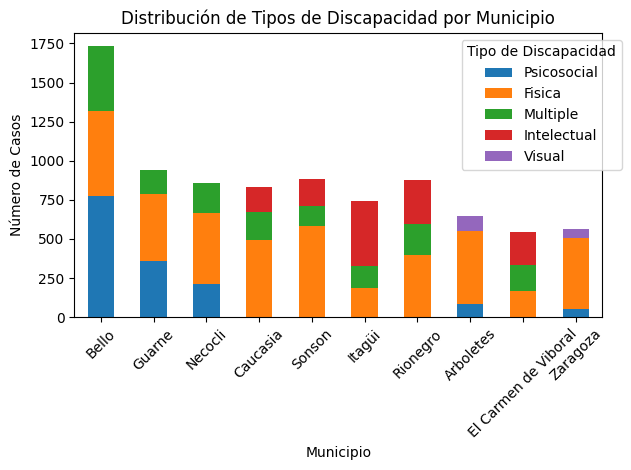

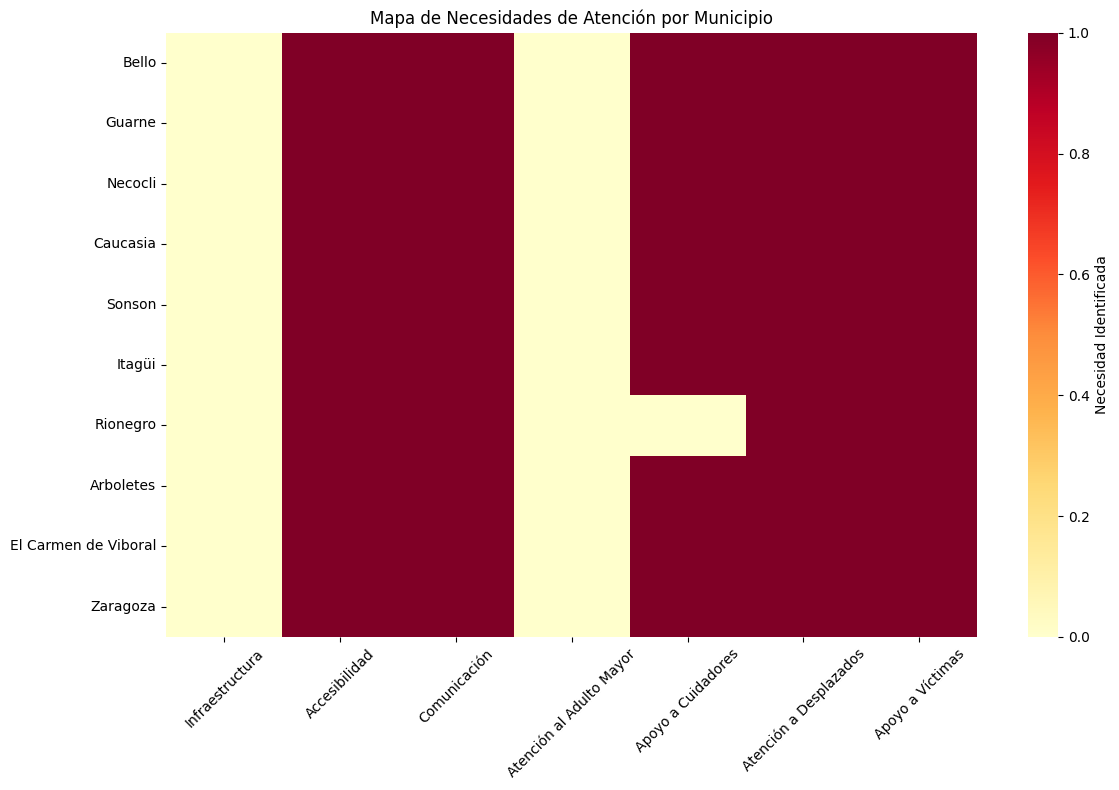

<Figure size 1500x800 with 0 Axes>

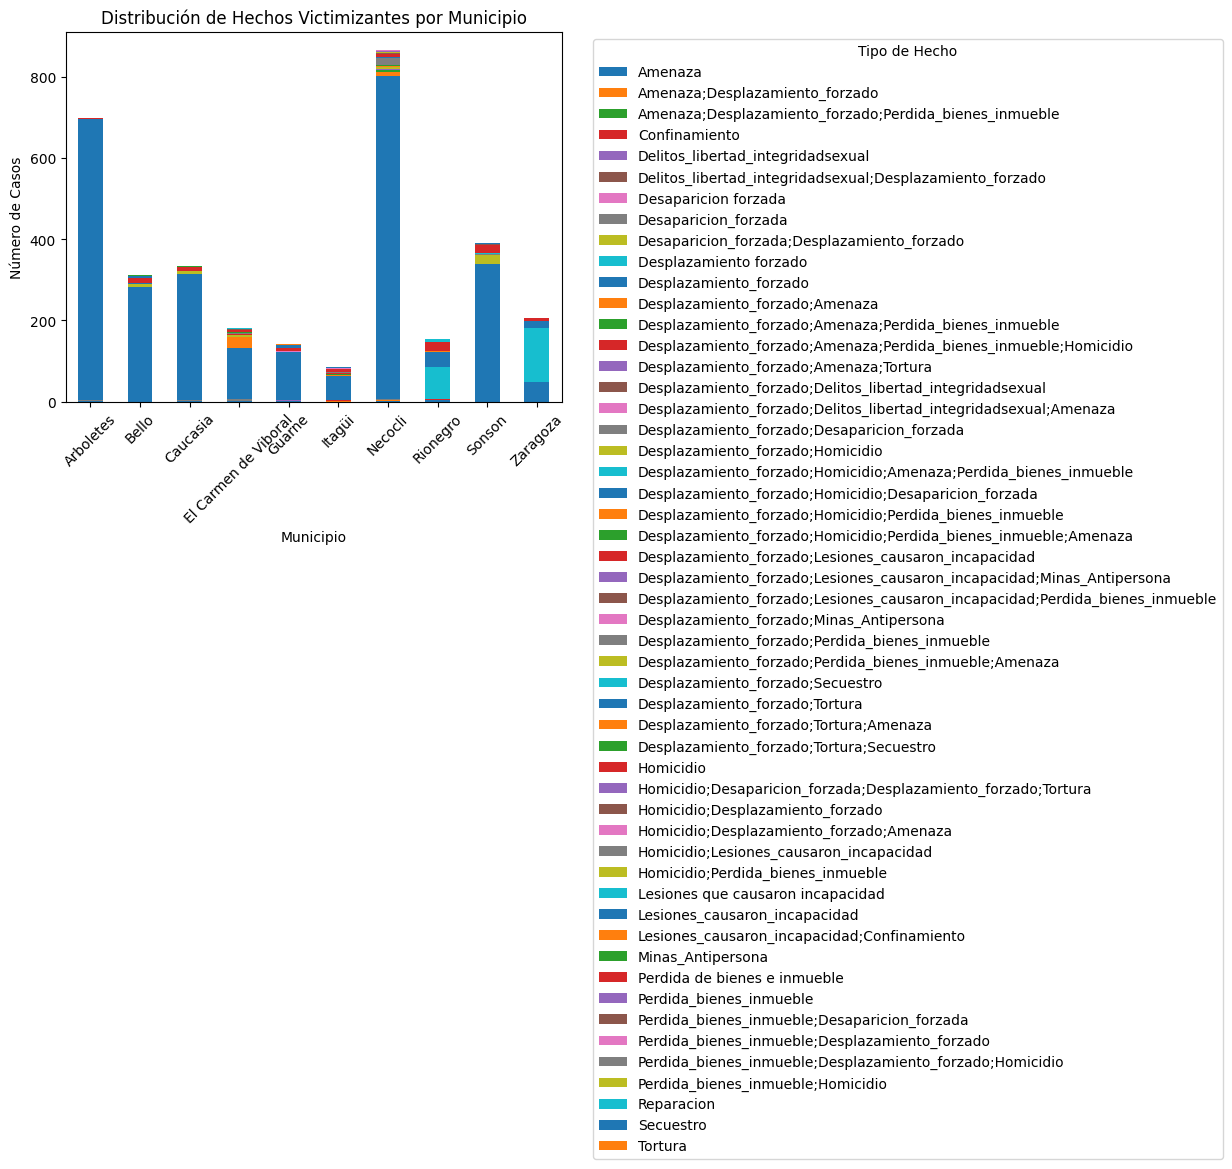

In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparar los datos
filepath = r"C:\Users\Lenovo\Visual\ARI\ARI\ProyectoIntegrador\prep-data\pcd_1211.csv"
df = pd.read_csv(filepath, sep=';')

# Combinar la información de discapacidad
df['discapacidad_combinada'] = (
    df['Tipo de discapacidad'].fillna('') + ' ' + 
    df['Describa aqui el diagnostico medico'].fillna('')
)

# Agrupar por municipio
municipios_discapacidades = df.groupby('Municipio de residencia (PcD)')['discapacidad_combinada'].agg(
    lambda x: ' '.join(x)
).reset_index()

# 2. Crear matriz TF-IDF por municipio
tfidf = TfidfVectorizer(
    min_df=2,
    max_df=0.95,
    stop_words=spanish_stop_words
)
tfidf_matrix = tfidf.fit_transform(municipios_discapacidades['discapacidad_combinada'])

# 3. Calcular similitud entre municipios
similarity_matrix = cosine_similarity(tfidf_matrix)

def get_policy_recommendations(municipio, top_n=5):
    """
    Genera recomendaciones de políticas para un municipio específico incluyendo hechos victimizantes
    """
    # Encontrar el índice del municipio
    idx = municipios_discapacidades[
        municipios_discapacidades['Municipio de residencia (PcD)'] == municipio
    ].index[0]
    
    # Obtener similitudes con otros municipios
    similar_scores = list(enumerate(similarity_matrix[idx]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener municipios similares (excluyendo el mismo municipio)
    similar_municipios = similar_scores[1:top_n+1]
    
    # Analizar tipos de discapacidad predominantes
    municipio_data = df[df['Municipio de residencia (PcD)'] == municipio]
    
    # Contar tipos de discapacidad
    tipos_discapacidad = Counter(
        [tipo.strip() for tipos in municipio_data['Tipo de discapacidad'].dropna() 
         for tipo in tipos.split(',')]
    )
    
    # Analizar hechos victimizantes
    hechos_victimizantes = Counter(municipio_data['Hecho Victimizante'].dropna())
    
    # Generar recomendaciones basadas en el análisis
    recomendaciones = {
        'municipio': municipio,
        'perfil': {
            'total_casos': len(municipio_data),
            'tipos_principales': dict(tipos_discapacidad.most_common(3)),
            'hechos_victimizantes': dict(hechos_victimizantes.most_common()),
            'edad_promedio': municipio_data['Edad de la PcD'].mean(),
            'pct_con_cuidador': (municipio_data['Tiene cuidador'] == 'Si').mean() * 100
        },
        'municipios_similares': [
            {
                'municipio': municipios_discapacidades.iloc[idx]['Municipio de residencia (PcD)'],
                'similitud': score
            }
            for idx, score in similar_municipios
        ],
        'recomendaciones': []
    }
    
    # Reglas para recomendaciones basadas en el análisis
    # Recomendaciones por tipo de discapacidad
    if 'Física' in str(tipos_discapacidad):
        recomendaciones['recomendaciones'].append({
            'tipo': 'Infraestructura',
            'acciones': [
                'Implementar rampas y accesos adaptados en espacios públicos',
                'Adaptar el transporte público con elevadores',
                'Crear espacios deportivos adaptados'
            ]
        })
    
    if 'Visual' in str(tipos_discapacidad):
        recomendaciones['recomendaciones'].append({
            'tipo': 'Accesibilidad',
            'acciones': [
                'Implementar señalización en Braille',
                'Instalar semáforos sonoros',
                'Crear programas de capacitación en tecnologías asistivas'
            ]
        })
    
    if 'Auditiva' in str(tipos_discapacidad):
        recomendaciones['recomendaciones'].append({
            'tipo': 'Comunicación',
            'acciones': [
                'Capacitar personal en lengua de señas',
                'Implementar servicios de interpretación',
                'Crear programas de inclusión laboral específicos'
            ]
        })
    
    # Recomendaciones basadas en hechos victimizantes
    hechos = [hecho.lower() for hecho in hechos_victimizantes.keys()]
    
    if any('desplazamiento' in hecho for hecho in hechos):
        recomendaciones['recomendaciones'].append({
            'tipo': 'Atención a Desplazados',
            'acciones': [
                'Programas de vivienda adaptada',
                'Apoyo psicosocial especializado',
                'Ayudas para reubicación',
                'Programas de integración comunitaria'
            ]
        })
    
    if any('homicidio' in hecho for hecho in hechos):
        recomendaciones['recomendaciones'].append({
            'tipo': 'Apoyo a Víctimas',
            'acciones': [
                'Acompañamiento psicológico especializado',
                'Grupos de apoyo para familiares',
                'Asistencia legal',
                'Programas de memoria histórica'
            ]
        })
    
    if recomendaciones['perfil']['edad_promedio'] > 60:
        recomendaciones['recomendaciones'].append({
            'tipo': 'Atención al Adulto Mayor',
            'acciones': [
                'Implementar programas de atención domiciliaria',
                'Crear centros de día especializados',
                'Desarrollar actividades de socialización adaptadas'
            ]
        })
    
    if recomendaciones['perfil']['pct_con_cuidador'] > 50:
        recomendaciones['recomendaciones'].append({
            'tipo': 'Apoyo a Cuidadores',
            'acciones': [
                'Crear programas de respiro familiar',
                'Implementar talleres de capacitación para cuidadores',
                'Desarrollar grupos de apoyo y acompañamiento psicológico'
            ]
        })
    
    return recomendaciones

def analyze_multiple_municipalities(df, n_municipios=10):
    """
    Analiza los n municipios con mayor número de casos y genera un resumen comparativo
    """
    # Obtener los municipios con más casos
    top_municipios = df['Municipio de residencia (PcD)'].value_counts().head(n_municipios).index
    
    # Almacenar resultados
    resultados = []
    
    for municipio in top_municipios:
        recomendaciones = get_policy_recommendations(municipio)
        resultados.append(recomendaciones)
    
    return resultados

def create_disability_visualization(df, resultados):
    """
    Crea visualizaciones significativas incluyendo hechos victimizantes
    """
    # 1. Gráfico de barras apiladas de tipos de discapacidad por municipio
    plt.figure(figsize=(15, 10))
    
    # Preparar datos para el gráfico
    municipios_data = []
    for res in resultados:
        municipio = res['municipio']
        tipos = res['perfil']['tipos_principales']
        tipos_dict = {'municipio': municipio}
        tipos_dict.update(tipos)
        municipios_data.append(tipos_dict)
    
    # Crear DataFrame para la visualización
    viz_df = pd.DataFrame(municipios_data)
    viz_df.set_index('municipio', inplace=True)
    
    # Crear gráfico
    ax = viz_df.plot(kind='bar', stacked=True)
    plt.title('Distribución de Tipos de Discapacidad por Municipio')
    plt.xlabel('Municipio')
    plt.ylabel('Número de Casos')
    plt.xticks(rotation=45)
    plt.legend(title='Tipo de Discapacidad', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    
    # 2. Mapa de calor de necesidades de atención
    plt.figure(figsize=(12, 8))
    
    # Preparar matriz de necesidades
    necesidades = ['Infraestructura', 'Accesibilidad', 'Comunicación', 
                  'Atención al Adulto Mayor', 'Apoyo a Cuidadores',
                  'Atención a Desplazados', 'Apoyo a Víctimas']
    matriz_necesidades = np.zeros((len(resultados), len(necesidades)))
    
    for i, res in enumerate(resultados):
        for j, necesidad in enumerate(necesidades):
            # Verificar si la necesidad está en las recomendaciones
            matriz_necesidades[i, j] = any(rec['tipo'] == necesidad 
                                         for rec in res['recomendaciones'])
    
    # Crear mapa de calor
    sns.heatmap(matriz_necesidades, 
                xticklabels=necesidades,
                yticklabels=[res['municipio'] for res in resultados],
                cmap='YlOrRd',
                cbar_kws={'label': 'Necesidad Identificada'})
    
    plt.title('Mapa de Necesidades de Atención por Municipio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 3. Gráfico de hechos victimizantes por municipio
    plt.figure(figsize=(15, 8))
    
    # Preparar datos de hechos victimizantes
    hechos_data = []
    for res in resultados:
        for hecho, count in res['perfil']['hechos_victimizantes'].items():
            hechos_data.append({
                'municipio': res['municipio'],
                'hecho': hecho,
                'count': count
            })
    
    # Crear DataFrame para visualización
    hechos_df = pd.DataFrame(hechos_data)
    
    if not hechos_df.empty:
        # Crear gráfico de barras apiladas
        pivot_table = hechos_df.pivot_table(
            index='municipio',
            columns='hecho',
            values='count',
            fill_value=0
        )
        
        ax = pivot_table.plot(kind='bar', stacked=True)
        plt.title('Distribución de Hechos Victimizantes por Municipio')
        plt.xlabel('Municipio')
        plt.ylabel('Número de Casos')
        plt.xticks(rotation=45)
        plt.legend(title='Tipo de Hecho', bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
    
    return plt.gcf()

def generate_complete_analysis(df, n_municipios=10):
    """
    Genera un análisis completo incluyendo recomendaciones y visualizaciones
    """
    # Obtener recomendaciones para múltiples municipios
    resultados = analyze_multiple_municipalities(df, n_municipios)
    
    # Crear visualizaciones
    figuras = create_disability_visualization(df, resultados)
    
    # Imprimir resumen detallado
    print("\nANÁLISIS COMPLETO DE DISCAPACIDAD Y HECHOS VICTIMIZANTES POR MUNICIPIOS")
    print("=" * 50)
    
    for resultado in resultados:
        print(f"\nMUNICIPIO: {resultado['municipio']}")
        print("-" * 30)
        
        # Información del perfil
        print("\nPerfil del municipio:")
        print(f"Total casos: {resultado['perfil']['total_casos']}")
        print(f"Edad promedio: {resultado['perfil']['edad_promedio']:.1f} años")
        print(f"Porcentaje con cuidador: {resultado['perfil']['pct_con_cuidador']:.1f}%")
        
        # Tipos principales de discapacidad
        print("\nTipos principales de discapacidad:")
        for tipo, cantidad in resultado['perfil']['tipos_principales'].items():
            print(f"- {tipo}: {cantidad} casos")
        
        # Hechos victimizantes
        print("\nHechos victimizantes:")
        for hecho, cantidad in resultado['perfil']['hechos_victimizantes'].items():
            print(f"- {hecho}: {cantidad} casos")
        
        # Municipios similares
        print("\nMunicipios similares:")
        for mun in resultado['municipios_similares']:
            print(f"- {mun['municipio']}: {mun['similitud']:.2f} similitud")
        
        # Recomendaciones
        print("\nRecomendaciones principales:")
        for rec in resultado['recomendaciones']:
            print(f"\n{rec['tipo']}:")
            for accion in rec['acciones']:
                print(f"- {accion}")
    
    return resultados, figuras

# Ejecutar el análisis completo
resultados, figuras = generate_complete_analysis(df)

# Mostrar las visualizaciones
plt.show()